## efood Case Study on User Segmentation

We are given a data set of food orders for Januery excluding Athens and Thessaloniki. We have procced the orginal data set and have create a file that we will upload with the bellow variables:

user: unique user id
user_orders_freq: order frequency per user
basket_value: avg basket value per user

Woring the dataset above we need to:

- Segment existing customers based on their frequency and order value. 


This Notebook will provide the data needed for our final deck. We wille xport the csv and do some final manipulation in excel if needed.


## Import libraries

In [42]:
# pandas is used for data manipulation
import pandas as pd
# numpy gives us access to some useful data structures
import numpy as np

# matplotlib allows us to do basic plots
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is another visualisation library
import seaborn as sns

# Import a scalar
from sklearn.preprocessing import scale

# Bring in k-means
from sklearn.cluster import KMeans

## Sourcing the data

In [43]:
# Import the data
df = pd.read_csv('efood_userdatabasket.csv')
df.head()

,user,user_orders_freq,basket_value
0,106414882,33,6.130303
1,50885108,31,5.316129
2,42623692,29,9.613793
3,12351828,28,5.264286
4,72180854,28,4.389286


## Exploring and transforming the data

Now that we've imported our data, it's useful to run a few summary functions on it in order to understand it better.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162954 entries, 0 to 162953
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user              162954 non-null  int64  
 1   user_orders_freq  162954 non-null  int64  
 2   basket_value      162954 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.7 MB


In [45]:
#we want to change the float for kmeans purposes
df['basket_value'] = df['basket_value'].astype(int)

In [66]:
#quick check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162954 entries, 0 to 162953
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   user              162954 non-null  int64
 1   user_orders_freq  162954 non-null  int64
 2   basket_value      162954 non-null  int64
 3   cluster_1         162954 non-null  int32
dtypes: int32(1), int64(3)
memory usage: 4.4 MB


In [47]:
#some more info around our variables
df.describe()

,user,user_orders_freq,basket_value
count,1.629540e+05,162954.000000,162954.000000
mean,8.210683e+07,2.454680,9.320452
std,5.623636e+07,2.306284,6.365620
min,2.746200e+04,1.000000,0.000000
25%,3.619502e+07,1.000000,5.000000
50%,7.306845e+07,2.000000,8.000000
75%,1.126347e+08,3.000000,12.000000
max,1.982852e+08,33.000000,134.000000


we can see that we have 162,954 users with an avg basket value of 9.7 products per basket. We also see a 134 basket value 

<AxesSubplot:xlabel='user_orders_freq', ylabel='basket_value'>

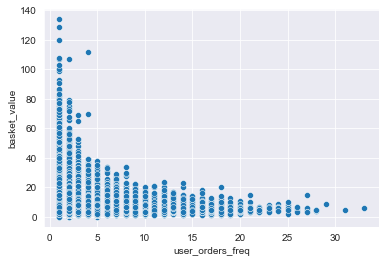

In [48]:
# create scatter plot through seaborn in order to visualise our data
sns.scatterplot(x="user_orders_freq", y="basket_value",data=df)

We see that actually there are not big outliers into the dataset - as well that the main catgorisation is between high value order low frequency and the oposite

## Scaling the data

Before running any clustering analysis, it is important to [_scale_ our data](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).


from sklearn.preprocessing import scale

In [49]:
#Import the scale method from sklearn.preprocessing in your libraries section
from sklearn.preprocessing import scale

In [50]:
#we scale so we make sure that the clustering is done correctly and not messed up - normalization - standarisation 

data_scaled = scale(df[['user_orders_freq','basket_value']])
print (data_scaled)

[[13.24443124 -0.5216244 ]
 [12.3772325  -0.67871877]
 [11.51003377 -0.05034127]
 ...
 [-0.63074853 -0.36453002]
 [-0.63074853  0.89222499]
 [-0.63074853 -0.99290753]]


## Modelling with k-means

To run the k-means algorithm, we will use the KMeans method from scikit-learn.

In [51]:
from sklearn.cluster import KMeans
import numpy as np

In [52]:

# we will create a list of the different values of k to test. 
num_clusters = [1,2,3,4,5,6,7,8,9,10]

# we will create a kmeans model for each value of k. Could use a regular for loop, but let's use a "list comprehension"!
kmeans_list = [KMeans(n_clusters = i) for i in num_clusters]

# For each value of k, fit the model with our data and use the "inertia" method of KMeans to compute the WSS
scores = [kmeans_list[i-1].fit(data_scaled).inertia_ for i in num_clusters]



/Users/sofokliszymnis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Elbow test')

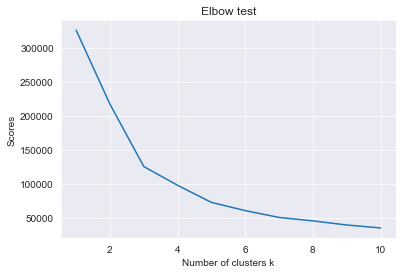

In [53]:
# We can choose to set a grid
sns.set_style('darkgrid')

# Use the lineplot function from seaborn
sns.lineplot(num_clusters, scores)

# Adding a title and axis labels
plt.xlabel("Number of clusters k")
plt.ylabel("Scores")
plt.title("Elbow test")

#we want to go were the steepness ends 

Its clear that the after that at the number 3 we get the "elbow effect", sign that we should aim for 3 clusters

In [54]:
#Create teh model
model = KMeans(n_clusters = 3, random_state= 123)
#Fit the model to our data
model.fit(data_scaled)
# Save the results as a new column in our data
df['cluster_1'] = model.labels_

In [55]:
#Quick chet on our data set with the clusters
df.head()

,user,user_orders_freq,basket_value,cluster_1
0,106414882,33,6,0
1,50885108,31,5,0
2,42623692,29,9,0
3,12351828,28,5,0
4,72180854,28,4,0


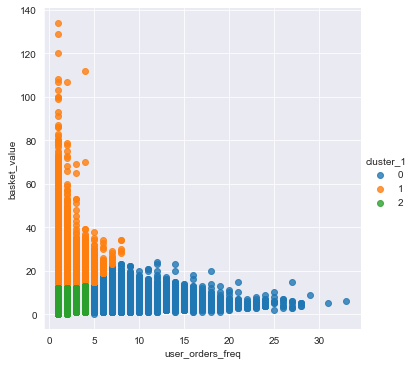

In [56]:
#We want ot visualise our cluster in order to get an understanding of the initial grouping
facet = sns.lmplot(data=df, x='user_orders_freq', y='basket_value',hue='cluster_1',
fit_reg=False, legend=True, legend_out=True)

So we can clearly see that the model has sperated our 3 groups in - 1) High frequency, low order value - 2) High order value low frequency - 3) Low order Value low Frequency

Now we need to connect our table with our whole dataset that was provided in order to get more information around our clusters.

## Merging our cluster with our main dataset

In [57]:
# Import the dataset with complete data 
df2 = pd.read_csv('efood_jan_orders.csv')
df2.head()

,order_id,brand,submit_dt,user_id,shop_id,city,cuisine_parent,basket
0,2821101907,GR-EFOOD,2021-01-06 17:39:51 UTC,27462,9348825,Χανιά Κρήτη,Traditional,10.6
1,2804826974,GR-EFOOD,2021-01-01 20:58:10 UTC,39238,41544867,Ρόδος,Italian,21.0
2,2897241626,GR-EFOOD,2021-01-27 15:57:21 UTC,39238,92205222,Ρόδος,Italian,14.0
3,2855674093,GR-EFOOD,2021-01-16 10:29:09 UTC,41354,165077697,Αγρίνιο,Breakfast,7.6
4,2867209239,GR-EFOOD,2021-01-19 13:02:02 UTC,41354,95344344,Αγρίνιο,Meat,8.0


In [58]:
#quick check on our original file and make sure we merge on the right variables 
df.head()

,user,user_orders_freq,basket_value,cluster_1
0,106414882,33,6,0
1,50885108,31,5,0
2,42623692,29,9,0
3,12351828,28,5,0
4,72180854,28,4,0


In [59]:
#merging our original df with our complete dataset

df3 = pd.merge(
    df2,
    df,
    how="left",
    left_on='user_id',
    right_on='user',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [61]:
#checking our new df3
df3.head()

,order_id,brand,submit_dt,user_id,shop_id,city,cuisine_parent,basket,user,user_orders_freq,basket_value,cluster_1
0,2821101907,GR-EFOOD,2021-01-06 17:39:51 UTC,27462,9348825,Χανιά Κρήτη,Traditional,10.6,27462,1,10,2
1,2804826974,GR-EFOOD,2021-01-01 20:58:10 UTC,39238,41544867,Ρόδος,Italian,21.0,39238,2,17,1
2,2897241626,GR-EFOOD,2021-01-27 15:57:21 UTC,39238,92205222,Ρόδος,Italian,14.0,39238,2,17,1
3,2855674093,GR-EFOOD,2021-01-16 10:29:09 UTC,41354,165077697,Αγρίνιο,Breakfast,7.6,41354,4,7,2
4,2867209239,GR-EFOOD,2021-01-19 13:02:02 UTC,41354,95344344,Αγρίνιο,Meat,8.0,41354,4,7,2


In [62]:
#we want to drop quickly some columns that we will not need or are dublicates
df3 = df3.drop(['user', 'basket_value','user_orders_freq'], axis=1)

In [63]:
#checking again our final df3
df3.head()

,order_id,brand,submit_dt,user_id,shop_id,city,cuisine_parent,basket,cluster_1
0,2821101907,GR-EFOOD,2021-01-06 17:39:51 UTC,27462,9348825,Χανιά Κρήτη,Traditional,10.6,2
1,2804826974,GR-EFOOD,2021-01-01 20:58:10 UTC,39238,41544867,Ρόδος,Italian,21.0,1
2,2897241626,GR-EFOOD,2021-01-27 15:57:21 UTC,39238,92205222,Ρόδος,Italian,14.0,1
3,2855674093,GR-EFOOD,2021-01-16 10:29:09 UTC,41354,165077697,Αγρίνιο,Breakfast,7.6,2
4,2867209239,GR-EFOOD,2021-01-19 13:02:02 UTC,41354,95344344,Αγρίνιο,Meat,8.0,2


In [64]:
#making sure the data look ok
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        400000 non-null  int64  
 1   brand           400000 non-null  object 
 2   submit_dt       400000 non-null  object 
 3   user_id         400000 non-null  int64  
 4   shop_id         400000 non-null  int64  
 5   city            400000 non-null  object 
 6   cuisine_parent  400000 non-null  object 
 7   basket          400000 non-null  float64
 8   cluster_1       400000 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 29.0+ MB


## Now we can export are data set and do some small extra manipulations in excel. A true data scientist would continue here, but as I havent written code for over 2 years, I believe its safer for me to do the small bites in excel. :)

In [65]:
#each user should specify the path they want to store the excel file
df3.to_csv(r'/Users/sofokliszymnis/Desktop/efoodclusters.csv', index = False)